# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
model_data = pd.get_dummies(penguins, columns = ["species", "island", "sex"], drop_first = True)
model_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [30]:
# Model 1: Predictor Variables - bill_length_mm
y = model_data['bill_depth_mm'] # response variables
X = model_data[['bill_length_mm']] # explanatory variables 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split into testing and validation

lr_fit = lr.fit(X_train, y_train) # fit linear model
lr_fit.coef_ # find coefficients
test_pred_lr = lr_fit.predict(X_test)
train_pred_lr = lr_fit.predict(X_train)

# Calculate MSE
test1MSE = mean_squared_error(y_test, test_pred_lr)
train1MSE = mean_squared_error(y_train, train_pred_lr)

In [31]:
# Model 2: Predictor Variables - bill_length_mm, body_mass_g, flipper_length_mm
y = model_data['bill_depth_mm'] # response variables
X = model_data[['bill_length_mm', 'body_mass_g', 'flipper_length_mm']] # explanatory variables 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split into testing and validation

lr_fit = lr.fit(X_train, y_train) # fit linear model
lr_fit.coef_ # find coefficients
test_pred_lr = lr_fit.predict(X_test)
train_pred_lr = lr_fit.predict(X_train)

# Calculate MSE
test2MSE = mean_squared_error(y_test, test_pred_lr)
train2MSE = mean_squared_error(y_train, train_pred_lr)

In [32]:
# Model 3: Predictor Variables - bill_length_mm, body_mass_g, flipper_length_mm, sex_male
y = model_data['bill_depth_mm'] # response variables
X = model_data[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'sex_male']] # explanatory variables 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split into testing and validation

lr_fit = lr.fit(X_train, y_train) # fit linear model
lr_fit.coef_ # find coefficients
test_pred_lr = lr_fit.predict(X_test)
train_pred_lr = lr_fit.predict(X_train)

# Calculate MSE
test3MSE = mean_squared_error(y_test, test_pred_lr)
train3MSE = mean_squared_error(y_train, train_pred_lr)

In [33]:
# Model 4: Predictor Variables - bill_length_mm, body_mass_g, flipper_length_mm, sex_male, 'island_Dream', 'island_Torgersen'
y = model_data['bill_depth_mm'] # response variables
X = model_data[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'sex_male', 'island_Dream', 'island_Torgersen']] # explanatory variables 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Split into testing and validation

lr_fit = lr.fit(X_train, y_train) # fit linear model
lr_fit.coef_ # find coefficients
test_pred_lr = lr_fit.predict(X_test)
train_pred_lr = lr_fit.predict(X_train)

# Calculate MSE
test4MSE = mean_squared_error(y_test, test_pred_lr)
train4MSE = mean_squared_error(y_train, train_pred_lr)

In [34]:
visual = pd.DataFrame()
visual["MSE"] = [test1MSE] + [test2MSE] + [test3MSE] + [test4MSE] + [train1MSE] + [train2MSE] + [train3MSE] + [train4MSE]
visual["measure"] = ["test"] + ["test"] + ["test"] + ["test"] + ["train"] + ["train"] + ["train"] + ["train"]
visual["predictors"] = [1] + [3] + [4] + [6] + [1] + [3] + [4] + [6]
visual

,MSE,measure,predictors
0,4.255957,test,1
1,2.052002,test,3
2,1.332410,test,4
3,0.920481,test,6
4,3.468720,train,1
5,2.538330,train,3
6,1.323120,train,4
7,1.265639,train,6


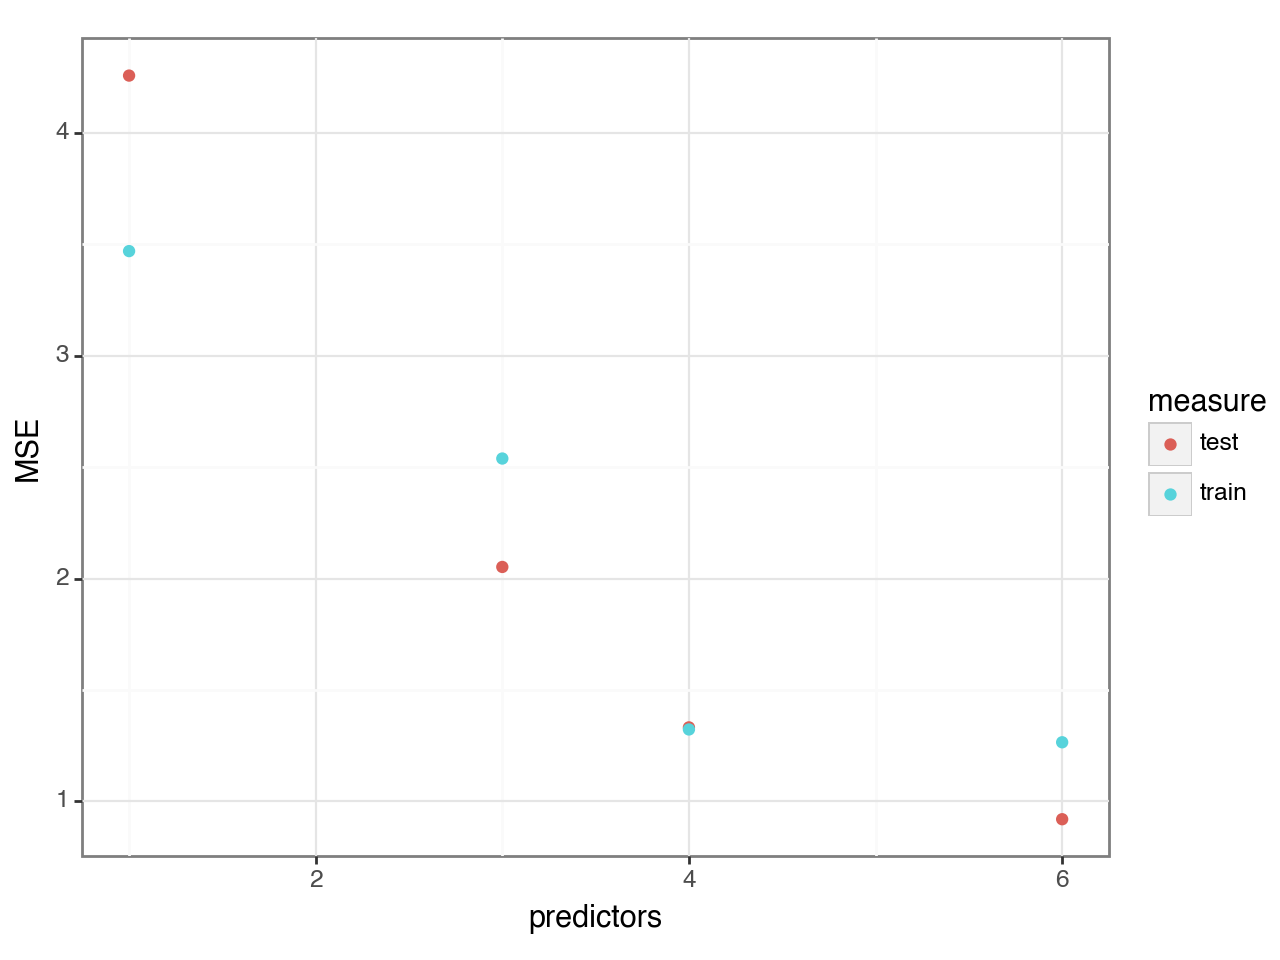

<Figure Size: (640 x 480)>

In [36]:
from plotnine import *

(ggplot(visual,
aes(
  x = "predictors",
  y = "MSE",
  color = "measure"
))
+ geom_point() 
+ theme_bw()
)

Based on the graph above, we would say that Model 4 (the model with 6 predictors) would be the best model since it has lowest MSE.